# Data Cleaning

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as scs
from statsmodels.formula.api import ols
from sklearn.linear_model import LinearRegression
%matplotlib inline

### Data: King County - Housing Sales Records

#### Real Estate Perspective/Business Insight:
Realtors get paid on a commission basis, usually 5 to 6 percent of a home’s *sales price*, which is split between the listing broker and buyer's agent. Fees typically come out of the sellers’ proceeds while buyers generally pay nothing to the agent who represents them. Commission splits depend on agreements between agents and brokes, but are ttypically split between agents are normally 50/50.

All real estate commissions must be paid directly to a broker, then the broker splits the commission with any other agents involved in the transaction. Agents are licensed salespersons who work under the umbrella of a designated broker. 

Sources:
https://www.rubyhome.com/blog/how-realtors-get-paid/,
https://www.investopedia.com/articles/personal-finance/080714/how-do-real-estate-agents-get-paid.asp

### Define Business Problem
Define audience:
    *Who is the stakeholder?* 
    *Who will be using model?* 

- A new real estate brokerage firm in King County looking for entry into the local housing market.

Define the business problem: 
    *How will they be using it?* 
    *What is the target?* 
    *What business problems will this solve?* 
    
- Where should the team attempt to scout clients to maximize gross house sale prices (to thus maximize commission)?

Define at least 3 questions exploring the problem:

##### Construct model to solve problem:
Model aims to answer price prediction for home features in specific areas (determined by above)

Define the target:
- Target = home sale price. 

Define the predictors:
- What are at least three features that exibit a linear relationship with sale price?

Solve problem:
- Build model to predict sale price based on input of selected features.



## Preprocessing Part 1: Data Understanding/Cleaning
Get familiar with the data, what it represents, and how it is represented. Clean data for exploratory data analysis (EDA).

In [2]:
df = pd.read_csv("./data/kc_house_data.csv")
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [3]:
print(df.shape) #21,597 housing records,  21 features
df.info() # check data types

(21597, 21)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


In [4]:
# check value counts for annomolies
for column in df.columns:
    print('________________________')
    print('------', column, '------ nunique:', df[column].nunique())
    print('------------------------')
    print(df[column].value_counts().sort_values())

________________________
------ id ------ nunique: 21420
------------------------
868001030     1
3023069166    1
2341300115    1
3336000626    1
3678900110    1
             ..
3935900232    2
9238500040    2
643300040     2
7961500010    2
795000620     3
Name: id, Length: 21420, dtype: int64
________________________
------ date ------ nunique: 372
------------------------
3/8/2015        1
5/24/2015       1
5/15/2015       1
11/30/2014      1
5/17/2014       1
             ... 
4/27/2015     126
7/8/2014      127
6/26/2014     131
6/25/2014     131
6/23/2014     142
Name: date, Length: 372, dtype: int64
________________________
------ price ------ nunique: 3622
------------------------
398950.0      1
324747.0      1
291970.0      1
406650.0      1
455800.0      1
           ... 
425000.0    150
500000.0    152
550000.0    159
450000.0    172
350000.0    172
Name: price, Length: 3622, dtype: int64
________________________
------ bedrooms ------ nunique: 12
------------------------
1

In [5]:
# filter out top outliers for bedroom, doesn't match with sq ft or bathrooms, could be an error
df.drop(df[df.bedrooms > 10].index, inplace=True)

### Handle missing values

In [6]:
df.isna().sum() # TODO handle NUll values

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [7]:
# only 146 are "yes", useless column?
# Yes, drop 'waterfront'
df['waterfront'].value_counts() 
df.drop('waterfront', inplace=True, axis=1)

In [8]:
# if no renovation data available, making assumption that no major renovation has occured
df['yr_renovated'].fillna(value=0, inplace=True)

In [9]:
# 0-4 ranking scale
# 2112 records greater than '0' or 'no view' -- only 9.77% of house records have better view than 'none'
# Replace NaN with 0 
# TODO just drop column?
df['view'].fillna(value = 0, inplace = True )
sum(df.loc[df['view'] > 0]['view'].value_counts()) / len(df)

0.09780041676313962

### Data Types

In [10]:
# series cast as string due to '?' place holder
df['sqft_basement'].value_counts()
sum(df.loc[df['sqft_basement'] == '0.0']['sqft_basement'].value_counts())/len(df) 
# 59.38% of records have '0.0 sqft_basement'
df.loc[df['sqft_basement'] != '?']['sqft_basement'].astype('float64').median()
# replace '?' with '0' as that tis the most common
df['sqft_basement'].replace(to_replace='?', value='0.0', inplace = True)
df['sqft_basement'] = df['sqft_basement'].astype('float64')

In [11]:
# change 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'])

In [12]:
df['date'].min(), df['date'].max() # sales data from 05/02/2014 to 05/27/2015 -- 1 yr 25 days

(Timestamp('2014-05-02 00:00:00'), Timestamp('2015-05-27 00:00:00'))

In [13]:
# check types and NaNs
print(sum(df.isna().sum()) == 0)
df.info() 

True
<class 'pandas.core.frame.DataFrame'>
Int64Index: 21595 entries, 0 to 21596
Data columns (total 20 columns):
id               21595 non-null int64
date             21595 non-null datetime64[ns]
price            21595 non-null float64
bedrooms         21595 non-null int64
bathrooms        21595 non-null float64
sqft_living      21595 non-null int64
sqft_lot         21595 non-null int64
floors           21595 non-null float64
view             21595 non-null float64
condition        21595 non-null int64
grade            21595 non-null int64
sqft_above       21595 non-null int64
sqft_basement    21595 non-null float64
yr_built         21595 non-null int64
yr_renovated     21595 non-null float64
zipcode          21595 non-null int64
lat              21595 non-null float64
long             21595 non-null float64
sqft_living15    21595 non-null int64
sqft_lot15       21595 non-null int64
dtypes: datetime64[ns](1), float64(8), int64(11)
memory usage: 3.5 MB


### Duplicates and Variations

In [14]:
# check for repeating homes
# id column.... not a contributing factor towards modeling, yet useful for tracking data.... TODO keep? delete?
df['id'].value_counts()

795000620     3
722039087     2
1254200015    2
8832900780    2
7129304540    2
             ..
3420069065    1
7812801125    1
4364700875    1
3021059276    1
1777500160    1
Name: id, Length: 21418, dtype: int64

In [15]:
df.loc[df['id'] == 795000620]
# TODO house repeating... clearly same house, 3 sales prices listed within 6 months, not likely 3 different transactions that quickly?

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
17588,795000620,2014-09-24,115000.0,3,1.0,1080,6250,1.0,0.0,2,5,1080,0.0,1950,0.0,98168,47.5045,-122.33,1070,6250
17589,795000620,2014-12-15,124000.0,3,1.0,1080,6250,1.0,0.0,2,5,1080,0.0,1950,0.0,98168,47.5045,-122.33,1070,6250
17590,795000620,2015-03-11,157000.0,3,1.0,1080,6250,1.0,0.0,2,5,1080,0.0,1950,0.0,98168,47.5045,-122.33,1070,6250


In [16]:
#check for exact duplicates
df[df.duplicated(keep=False)]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15


In [17]:
#check for repeat sales
df[df.duplicated(['id', 'date'],keep=False)]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15


In [18]:
# check for 
df[df.duplicated(['id', 'price'],keep=False)]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
3946,1825069031,2014-08-14,550000.0,4,1.75,2410,8447,2.0,3.0,4,8,2060,350.0,1936,1980.0,98074,47.6499,-122.088,2520,14789
3947,1825069031,2014-10-16,550000.0,4,1.75,2410,8447,2.0,3.0,4,8,2060,350.0,1936,1980.0,98074,47.6499,-122.088,2520,14789
14968,6308000010,2014-12-08,585000.0,3,2.50,2290,5089,2.0,0.0,3,9,2290,0.0,2001,0.0,98006,47.5443,-122.172,2290,7984
14969,6308000010,2015-04-23,585000.0,3,2.50,2290,5089,2.0,0.0,3,9,2290,0.0,2001,0.0,98006,47.5443,-122.172,2290,7984
20037,8648900110,2014-05-05,555000.0,3,2.50,1940,3211,2.0,0.0,3,8,1940,0.0,2009,0.0,98027,47.5644,-122.093,1880,3078
20038,8648900110,2014-08-26,555000.0,3,2.50,1940,3211,2.0,0.0,3,8,1940,0.0,2009,0.0,98027,47.5644,-122.093,1880,3078


## Part 2: Data Exploration
### Feature engineering part 1

In [19]:
# sqft_above + sqft_basement seem to add up to sqft_living. 
# Drop sqft_above and convert sqft_basement to Y/N basement
df['has_basement'] = df['sqft_basement'].apply(lambda x: 1 if x > 0 else 0)
df.drop(['sqft_above', 'sqft_basement'], inplace=True, axis=1)

In [20]:
# Y/N reno
df['reno?'] = df['yr_renovated'].apply(lambda x: 1 if x > 0 else 0)

### Data Distribution

In [22]:
# examine stats per column
df.describe().apply(lambda s: s.apply(lambda x: format(x, 'g')))

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,has_basement,reno?
count,21595,21595,21595,21595,21595,21595,21595,21595,21595,21595,21595,21595,21595,21595,21595,21595,21595,21595,21595
mean,4.58071e+09,540293,3.37147,2.1158,2080.3,15100.3,1.4941,0.233202,3.40977,7.65798,1971,68.672,98077.9,47.5601,-122.214,1986.68,12759,0.385043,0.0344061
std,2.87677e+09,367384,0.902643,0.768992,918.122,41414.5,0.539686,0.764705,0.65048,1.17324,29.3739,363.817,53.5149,0.138555,0.140724,685.237,27275.6,0.486617,0.182274
min,1.0001e+06,78000,1,0.5,370,520,1,0,1,3,1900,0,98001,47.1559,-122.519,399,651,0,0
25%,2.12305e+09,322000,3,1.75,1430,5040,1,0,3,7,1951,0,98033,47.4711,-122.328,1490,5100,0,0
50%,3.90493e+09,450000,3,2.25,1910,7620,1.5,0,3,7,1975,0,98065,47.5718,-122.231,1840,7620,0,0
75%,7.309e+09,645000,4,2.5,2550,10686,2,0,4,8,1997,0,98118,47.678,-122.125,2360,10083,1,0
max,9.9e+09,7.7e+06,10,8,13540,1.65136e+06,3.5,4,5,13,2015,2015,98199,47.7776,-121.315,6210,871200,1,1


In [23]:
# organize columns in target and feature type
target = 'price'
cat_col = ['date', 'id','bedrooms', 'bathrooms', 'floors', 'view', 'condition', 
           'grade', 'zipcode','lat', 'long', 'yr_renovated', 'has_basement', 'reno?']
cont_col = ['sqft_living', 'sqft_lot', 'sqft_living15', 'sqft_lot15', 'yr_built']

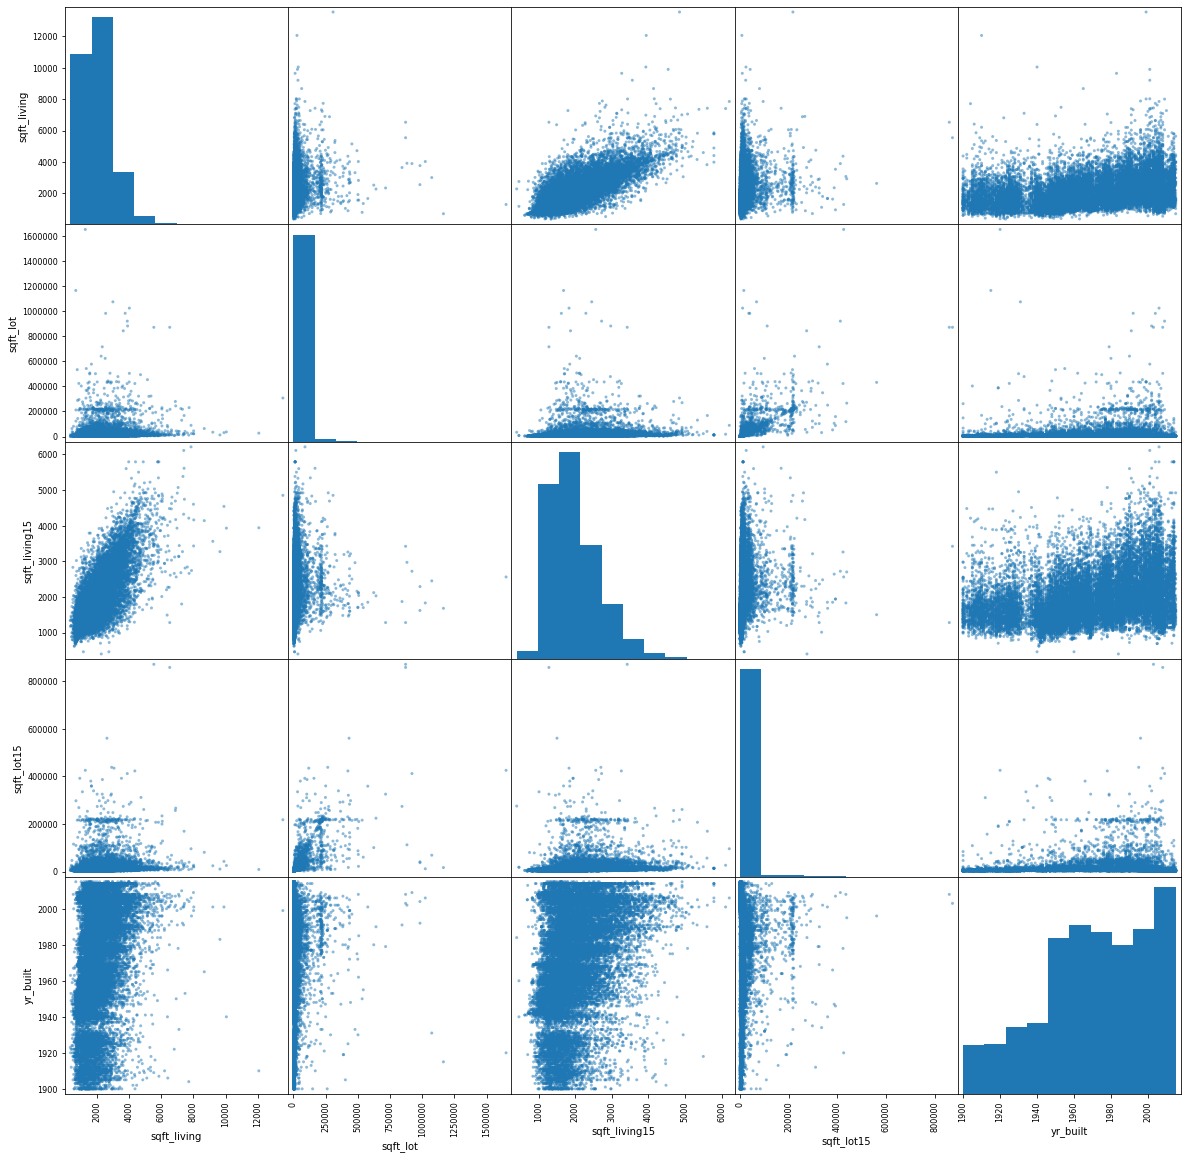

In [24]:
# scatter of continuous features
pd.plotting.scatter_matrix(df[cont_col], figsize=(20, 20))
plt.show()

# makes sense that lot size and house size would correlate with those or nearest 15 neighbors
# check lot size for substantial outliers

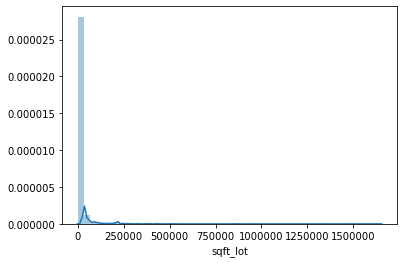

In [25]:
sns.distplot(df['sqft_lot'])
# yes wow

Number of sales with less than 56514.750487052006 sq ft lots: 20833
Dropped 762 of 21595 records (3.528594582079185%)


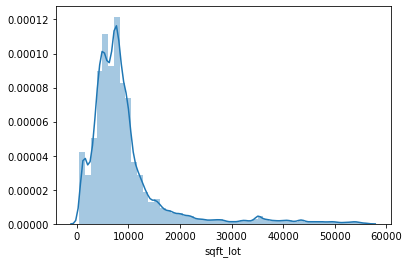

In [26]:
# drop anything greater than 2 standard deviations above mean
lot_std = df['sqft_lot'].mean() + (df['sqft_lot'].std()*1)
less_lot = df['sqft_lot'].loc[df['sqft_lot'] < lot_std]
print("Number of sales with less than", lot_std, "sq ft lots:", len(less_lot))
print(f"Dropped {len(df)-len(less_lot)} of {len(df)} records ({(len(df)-len(less_lot))/len(df)*100}%)")
sns.distplot(less_lot)

In [27]:
# looks better, drop the top outliers to move forward
df = df.loc[df['sqft_lot'] < lot_std]

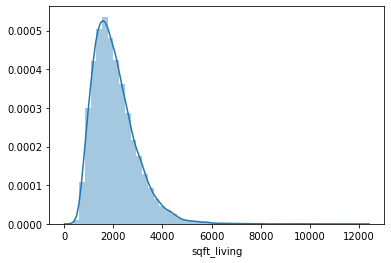

In [28]:
sns.distplot(df['sqft_living'])

Number of sales with less than 4724.824289274232 sq ft homes: 20609
Dropped 224 of 20833 records (1.0752172034752556%)


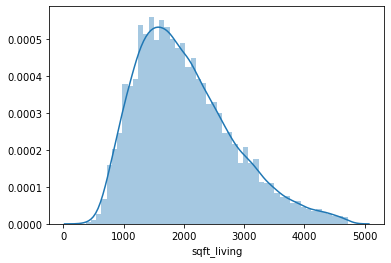

In [29]:
liv_std = df['sqft_living'].mean() + (df['sqft_living'].std()*3)
less_liv = df['sqft_living'].loc[df['sqft_living'] < liv_std]
print("Number of sales with less than", liv_std,"sq ft homes:", len(less_liv))
print(f"Dropped {len(df)-len(less_liv)} of {len(df)} records ({(len(df)-len(less_liv))/len(df)*100}%)")
sns.distplot(less_liv)

In [30]:
df = df.loc[df['sqft_living'] < liv_std]

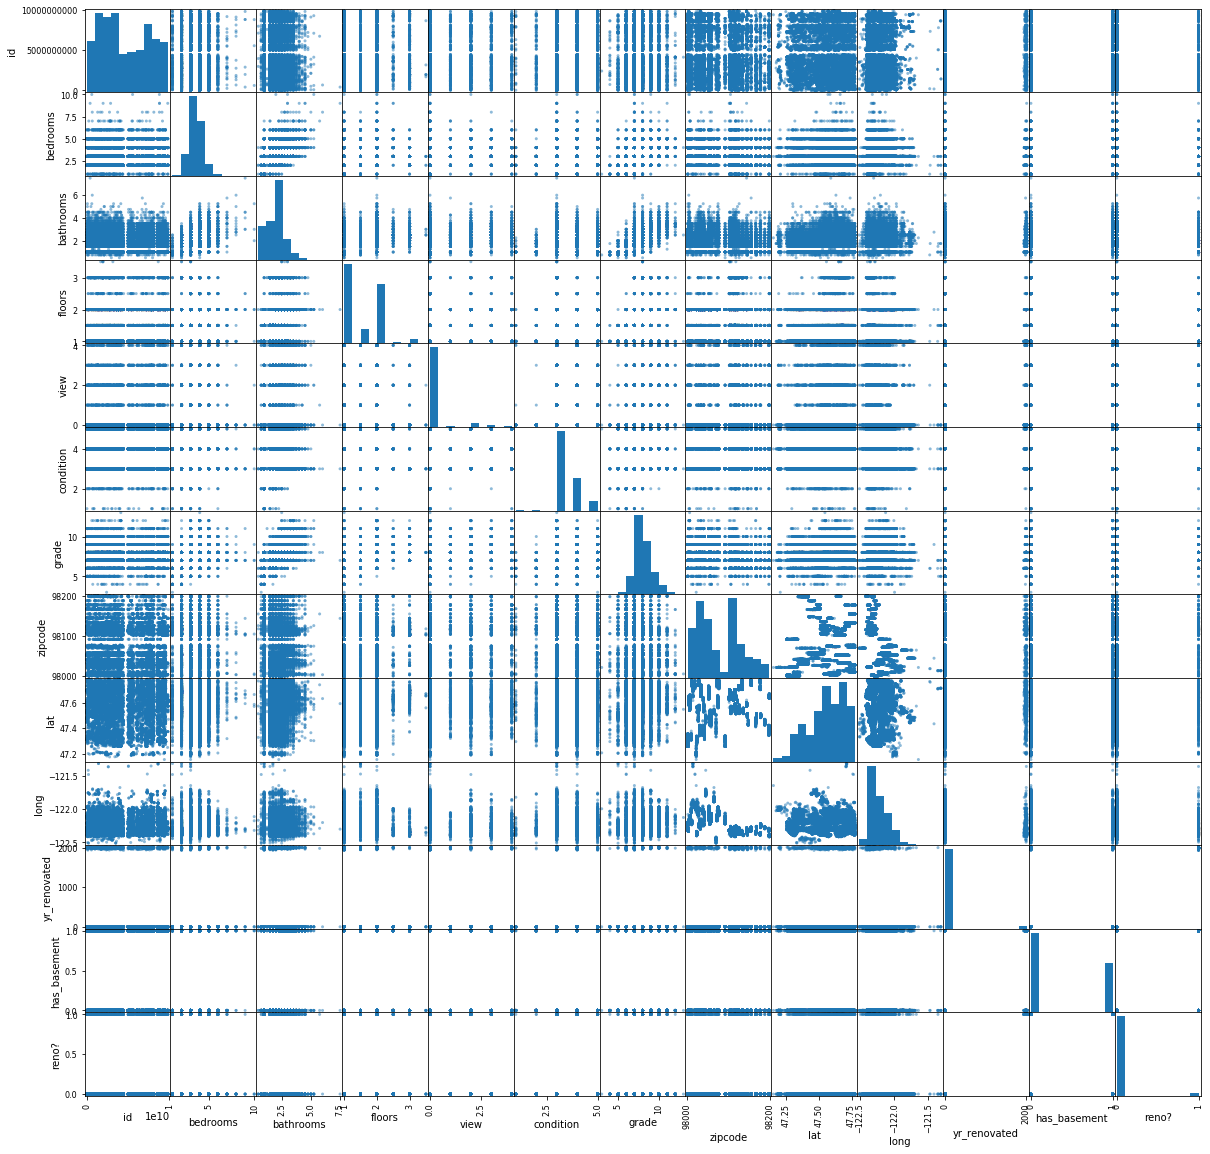

In [31]:
# scatter of categorical features
pd.plotting.scatter_matrix(df[cat_col], figsize=(20, 20))
plt.show()
# slight pattern observed between grade, view, bathrooms, bedrooms (as expected)
# grade is normally distributed
# perhaps drop related columns and just keep grade?

KeyError: 'sqft_living15'

<Figure size 1152x576 with 0 Axes>

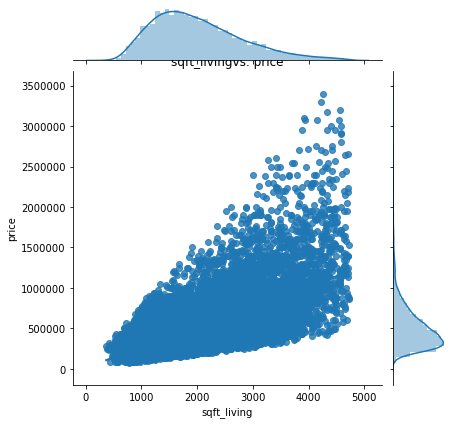

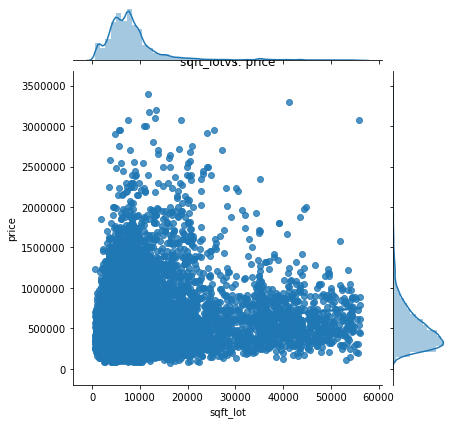

In [73]:
fig = plt.figure(figsize=(16,8))
for col in cont_col:
    sns.jointplot(df[col], df[target], kind='reg')
    plt.title(col + "vs. price")
    
# sqft living correlated with price more so than lot size. 
# Could be due to smaller properties are usually in denser areas (cities) with much greater cost.

In [ ]:
# scatter matrix of correlation TO TARGET -- useful for model??!
# lets find some features based on their correlation scores

columns_correlations = []
columns_non_numeric = []

for column in df.drop(columns=[target]).columns:
    try:
        corr = np.abs(df[column].corr(df[target]))
        t = (column, corr)
        columns_correlations.append(t)
    except:
        columns_non_numeric.append(column)
columns_correlations.sort(key =(lambda x: x[1]), reverse=True)
columns_correlations

In [ ]:
# get just name of features with a corr coeff of at least 0.2
correlated_features = [t[0] for t in columns_correlations if t[1] >= 0.20]
print(f"Removed {len(columns_correlations) - len(correlated_features)} features due to low correlation with target.")
print("Remaining featuers:")
correlated_features

In [ ]:
# add back target, view df
correlated_df = df[correlated_features + [target]]
correlated_df.head()

### Removing columns that aren't required for modeling

In [ ]:
# TODO
# to_remove = ['id', 'date' ]

In [ ]:
pd.plotting.scatter_matrix(correlated_df, figsize=(20, 20))
plt.show()

In [ ]:

sns.pairplot(df)

### Feature Engineering

In [69]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'view', 'condition', 'grade', 'yr_built',
       'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15',
       'has_basement', 'reno?', 'age', 'zipcode_mean_price', 'pop_den_by_zip',
       'age_decade'],
      dtype='object')

In [39]:
df['age'] = 2015 - df['yr_built']

In [66]:
df['age_decade'] = df['age']//10

In [70]:
df['reno_age'] = 2015 - df['yr_renovated']

#### Zip codes

In [71]:
# ratio sq foot to lot?
# living/lot to zip?? where are the biggest houses?
lot_mean = df.groupby(by='zipcode')['sqft_lot'].agg(np.mean).round(2)
liv_mean = df.groupby(by='zipcode')['sqft_living'].agg(np.mean).round(2)
df['zipcode_mean_lot'] = df['zipcode'].apply(lambda zipcode: lot_mean.get(zipcode))
df['zipcode_mean_liv'] = df['zipcode'].apply(lambda zipcode: liv_mean.get(zipcode))
df.drop(labels=['sqft_living15', 'sqft_lot15'], axis=1, inplace=True)

In [ ]:
df['zipcode_mean_liv'].plot.box() 

In [ ]:
# much for variance for lot size, make sense as you move out into the burbs
df['zipcode_mean_lot'].plot.box()

In [ ]:
# drop neighbors and use mean based off this data for ranking zips
# df.head()


In [ ]:
df['zip_rank_liv'] = df['zipcode_mean_liv'].apply(rank_zip_liv)

In [ ]:
df.head()

#### Poplation Densisty (information from King County website)

In [54]:
zipcode = [98178, 98125, 98028, 98136, 98074, 98053, 98003, 98198, 98146, 98038, 98007, 98115, 98107, 98126, 98019, 98103, 98002, 98133, 98040, 98092, 98030, 98119, 98112, 98052, 98027, 98117, 98058, 98001, 98056, 98166, 98023, 98070, 98148, 98105, 98042, 98008, 98059, 98122, 98144, 98004, 98005, 98034, 98075, 98116, 98010, 98118, 98199, 98032, 98045, 98102, 98077, 98108, 98168, 98177, 98065, 98029, 98006, 98109, 98022, 98033, 98155, 98024, 98011, 98031, 98106, 98072, 98188, 98014, 98055, 98039]
pop_density = [4966, 6879, 3606, 6425, 2411, 662, 3800, 4441, 5573, 469, 5684, 7018, 9602, 6732, 141, 9905, 4423, 6279, 3591, 892, 4741, 8638, 6667, 2908, 469, 7953, 2215, 1717, 4323, 3580, 4604, 288, 3194, 10643, 1537, 4437, 1725, 13594, 7895, 3977, 2361, 4428, 2185,  7523, 334, 6841, 4714, 2024, 41, 15829, 785, 2989, 3794, 3341, 171, 2719, 3402, 10361, 52,3696, 4330, 236, 3569, 4877, 4161, 1231, 3062, 149, 4585, 2059] 
zip_density = list(zip(zipcode, pop_density)) 
pop_density_by_zip = dict(zip_density)

In [55]:
df['pop_den_by_zip'] = df['zipcode'].map(pop_density_by_zip)

In [57]:
d = {'zipcode': zipcode, 'pop_density': pop_density}
df_dens = pd.DataFrame(d).set_index('zipcode')
df_dens.head()

,pop_density
zipcode,
98178,4966
98125,6879
98028,3606
98136,6425
98074,2411


In [ ]:
df_dens.to_csv("./data/pop_density_by_zip.csv")

In [47]:
# rank zipcodes by mean price 1 lowest - 5 max
# get zipcode means
zipcode_mean = df.groupby(by='zipcode')['price'].agg(np.mean).round(2)
# adds new column, searches entire zip code column by row, adds zipcode_mean value depending on which zip in row
df['zipcode_mean_price'] = df['zipcode'].apply(lambda zipcode: zipcode_mean.get(zipcode))

In [48]:
df['zipcode_mean_price'].describe().apply(lambda x: format(x, 'f'))

count      20609.000000
mean      519211.905283
std       210150.980547
min       234284.040000
25%       345204.020000
50%       486767.470000
75%       618695.110000
max      1700128.210000
Name: zipcode_mean_price, dtype: object

In [ ]:
df.boxplot(column=['zipcode_mean_price'])
plt.show()

In [49]:
def rank_zip_price(zipcode_mean_price):
    rank_5 = 1.5*df['zipcode_mean_price'].quantile(0.75)
    rank_4 = df['zipcode_mean_price'].quantile(0.75)
    rank_3 = df['zipcode_mean_price'].quantile(0.50)
    rank_2 = df['zipcode_mean_price'].quantile(0.25)
    rank_1 = df['zipcode_mean_price'].quantile(0)
    if zipcode_mean_price > rank_5:
        return 5
    if zipcode_mean_price > rank_4:
        return 4
    if zipcode_mean_price > rank_3:
        return 3
    if zipcode_mean_price > rank_2:
        return 2
    return 1


In [33]:
df['zip_rank_price'] = df['zipcode_mean_price'].apply(rank_zip_price)
df.head()

KeyError: 'zipcode_mean_price'

In [37]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'view', 'condition', 'grade', 'yr_built',
       'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15',
       'has_basement', 'reno?'],
      dtype='object')

In [63]:
# group by zip and agg.mean() continuous columns, count number of sale records
zipcode_df = df.groupby('zipcode').agg({'id': 'nunique','price':'mean','sqft_living': 'mean', 
                                        'sqft_lot':'mean', 'condition': 'mean', 'grade': 'mean', 
                                        'age': 'mean'}).apply(lambda x: round(x, 2))
# rename columns to reflect agg
zipcode_df.rename({'id': 'num_homes','price':'mean_price','sqft_living': 'mean_sqft_liv', 
                   'sqft_lot':'mean_sqft_lot', 'condition': 'mean_cond', 
                   'grade': 'mean_grade', 'age': 'mean_age'}, axis=1, inplace=True)
# apply zip rank system (based on avg housing price)
zipcode_df['zip_rank_price'] = zipcode_df['mean_price'].apply(rank_zip_price)
# reorder columns
zipcode_df = zipcode_df[['mean_price', 'mean_sqft_liv', 'mean_sqft_lot', 'mean_cond', 'mean_grade',
                         'mean_age','zip_rank_price', 'num_homes']]
# add population data
zipcode_df = pd.concat([zipcode_df, df_dens], join='inner', axis=1)

In [64]:
zipcode_df.head()

,mean_price,mean_sqft_liv,mean_sqft_lot,mean_cond,mean_grade,mean_age,zip_rank_price,num_homes,pop_density
zipcode,,,,,,,,,
98001,274046.57,1877.28,11624.40,3.34,7.27,33.92,1,344,1717
98002,234284.04,1627.74,7517.63,3.74,6.69,47.23,1,197,4423
98003,287391.09,1885.41,9929.78,3.38,7.51,38.05,1,270,3800
98004,1226456.14,2681.36,12620.81,3.52,8.49,45.17,5,292,3977
98005,785765.21,2546.92,17383.81,3.71,8.40,45.64,4,159,2361


In [65]:
# export!!
zipcode_df.to_csv("./data/zipcode_averages.csv")

In [ ]:
# TODO drop precursors to engineered columns

In [ ]:
# TODO rearrange columns

In [ ]:
# drop columns not useful like id, datta ettc etc. etc.

### Export scrubbed data

For use in non-linear EDA

- Corrected data types
- Checked for duplicates
- Replaced Null values as appropriate
- Dropped columns missing too much information
- Cropper outliers
- Engineered new columns for home age, reno information, zip code classifications

In [72]:
df.to_csv("./data/kc_house_data_cleaned.csv")